# **Assignment**

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

####**Data description**

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv = "/content/drive/MyDrive/Colab Notebooks/medical_examination.csv"

In [ ]:
df = pd.read_csv(csv,
                 index_col = "id",
                 sep = ",")

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [ ]:
df["overweight"] = df.apply(lambda x: 1 if x["weight"]/((x["height"]/100)**2) > 25 else 0, axis = 1)

In [ ]:
df["overweight"].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


#### Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
df["cholesterol"] = df["cholesterol"].apply(lambda x: 1 if x > 1 else 0)

In [ ]:
df["cholesterol"].value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [ ]:
df["gluc"] = df["gluc"].apply(lambda x: 1 if x > 1 else 0)

In [ ]:
df["gluc"].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


#### Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [ ]:
df_cat = pd.melt(df, id_vars= ["cardio"],
                 value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],
                 value_name = "value"
                 ).sort_values(["variable"])

In [ ]:
df_cat.head()

,cardio,variable,value
349997,1,active,0
303338,0,active,1
303337,1,active,1
303336,1,active,1
303335,0,active,0


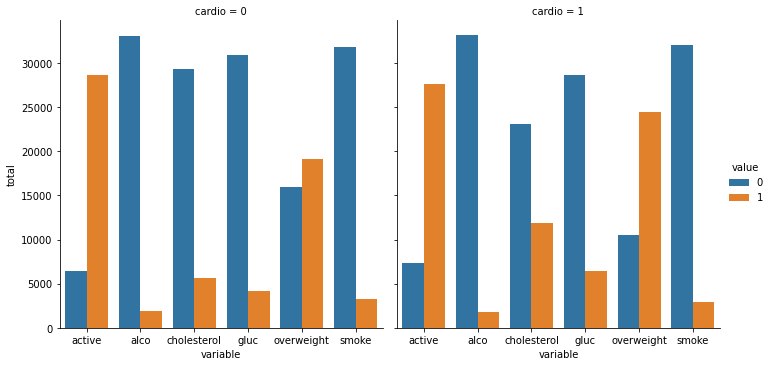

In [ ]:
fig = sns.catplot(data = df_cat, col = "cardio", x = "variable",
            hue = "value",
            kind = "count")
fig.set_ylabels("total")

#### Clean the data. Filter out the following patient segments that represent incorrect data:

* diastolic pressure is higher than systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [ ]:
df_heat = df[df["ap_lo"] <= df["ap_hi"]]
df_heat = df[df["height"] >= df["height"].quantile(0.025)]
df_heat = df[df["height"] <= df["height"].quantile(0.975)]
df_heat = df[df["weight"] >= df["weight"].quantile(0.025)]
df_heat = df[df["weight"] <= df["weight"].quantile(0.975)]

#### Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [ ]:
corr = df_heat.corr()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

In [ ]:
f, ax = plt.subplots(figsize=(11,9))

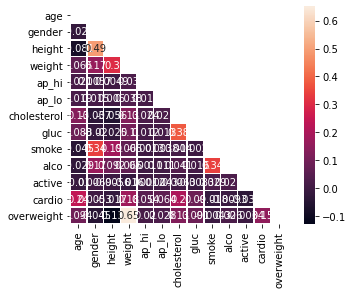

In [ ]:
sns.heatmap(corr, mask = mask, 
            square = True, linewidths=.5,
            annot=True)